In [2]:
import tensorflow as tf
import keras
import pandas
import sklearn
import matplotlib

In [4]:
import pandas as pd
df=pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
dataset = df.values
X = dataset[:,0:10]
Y = dataset[:,10]

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [12]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 18ms/step - loss: 0.6903 - accuracy: 0.5558 - val_loss: 0.6868 - val_accuracy: 0.5479
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.6898 - val_loss: 0.6783 - val_accuracy: 0.7717
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.7534 - val_loss: 0.6703 - val_accuracy: 0.7717
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.7534 - val_loss: 0.6635 - val_accuracy: 0.7626
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.7309 - val_loss: 0.6580 - val_accuracy: 0.7808
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.7652 - val_loss: 0.6522 - val_accuracy: 0.7808
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.7701 - val_loss: 0.6466 - val_accuracy: 0.7900
Epoch 8/100


In [14]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.9041


0.9041095972061157

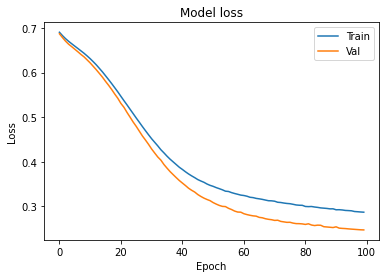

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

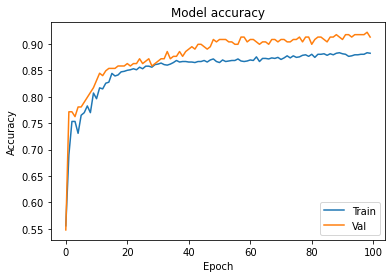

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [17]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 71ms/step - loss: 0.4908 - accuracy: 0.7554 - val_loss: 0.3167 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 2s 61ms/step - loss: 0.3563 - accuracy: 0.8542 - val_loss: 0.2856 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 2s 55ms/step - loss: 0.3270 - accuracy: 0.8757 - val_loss: 0.2720 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 2s 56ms/step - loss: 0.3031 - accuracy: 0.8718 - val_loss: 0.2842 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.3007 - accuracy: 0.8718 - val_loss: 0.2622 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 2s 49ms/step - loss: 0.2814 - accuracy: 0.8924 - val_loss: 0.2471 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 2s 50ms/step - loss: 0.2693 - accuracy: 0.8875 - val_loss: 0.2344 - val_accuracy: 0.9132
Epoch 

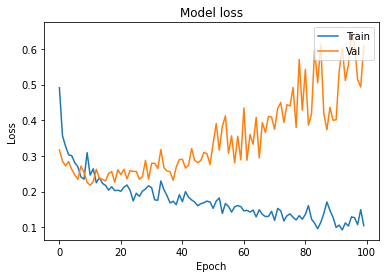

In [18]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

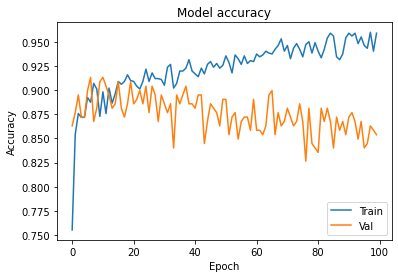

In [19]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [20]:
from keras.layers import Dropout
from keras import regularizers

In [21]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [22]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 5s 98ms/step - loss: 14.2265 - accuracy: 0.6654 - val_loss: 3.8942 - val_accuracy: 0.6438
Epoch 2/100
32/32 [==============================] - 2s 75ms/step - loss: 1.7071 - accuracy: 0.7926 - val_loss: 0.6985 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 2s 78ms/step - loss: 0.5759 - accuracy: 0.8571 - val_loss: 0.5910 - val_accuracy: 0.8037
Epoch 4/100
32/32 [==============================] - 3s 80ms/step - loss: 0.5238 - accuracy: 0.8718 - val_loss: 0.4448 - val_accuracy: 0.9087
Epoch 5/100
32/32 [==============================] - 3s 86ms/step - loss: 0.5367 - accuracy: 0.8464 - val_loss: 0.4649 - val_accuracy: 0.9132
Epoch 6/100
32/32 [==============================] - 3s 82ms/step - loss: 0.4817 - accuracy: 0.8748 - val_loss: 0.4451 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 2s 75ms/step - loss: 0.4757 - accuracy: 0.8767 - val_loss: 0.4235 - val_accuracy: 0.9087
Epoch

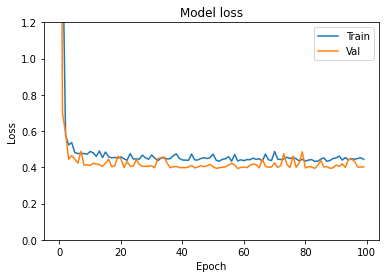

In [24]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

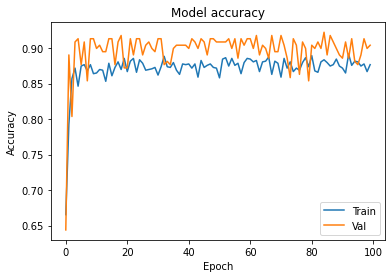

In [25]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()